# Pipeline Germinativo





# Parte 1 - Setup do ambiente de Bioinformática

## A - conectando ao Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## B - Criando a estrutura de diretórios


In [ ]:
%%bash
mkdir dados
mkdir dados/annovar
mkdir dados/gatk
mkdir logs

#copiar o arquivo Variantes_germinativas_variants.txt que está no meu drive para a pasta dados/gatk
#cp /content/drive/MyDrive/2023PosEinstein/Variantes_germinativas_variants.txt dados/gatk/.

mkdir: cannot create directory ‘dados’: File exists
mkdir: cannot create directory ‘dados/annovar’: File exists
mkdir: cannot create directory ‘dados/gatk’: File exists
mkdir: cannot create directory ‘logs’: File exists


CalledProcessError: ignored

## 1.2 Download do Annovar

In [ ]:
%%bash
wget https://github.com/Varstation/POS-BIOINFO/raw/master/annovar/annovar.zip \
1>logs/annovar_down.txt 2>logs/annovar_down_erros.txt

In [ ]:
%%bash
#Descompactação
unzip annovar.zip \
1>logs/annovar_unzip.txt 2>logs/annovar_unzip_erros.txt
rm annovar.zip

## 1.3 - Download das bases de dados do Annovar para o genoma de referência hg19

- refGene
- exac03
- avsnp147
- dbnsfp30a
- clinvar_20210123
- gnomad211_exome
- intervar
- revel

In [ ]:
%%bash
#refGene
perl annovar/annotate_variation.pl -buildver hg19 -downdb -webfrom annovar refGene annovar/humandb/ \
1>logs/refGene_down.txt 2>logs/refGene_down_erros.txt

#exac03
perl annovar/annotate_variation.pl -buildver hg19 -downdb -webfrom annovar exac03 annovar/humandb/ \
1>logs/exac03_down.txt 2>logs/exac03_down_erros.txt

#avsnp147
perl annovar/annotate_variation.pl -buildver hg19 -downdb -webfrom annovar avsnp147 annovar/humandb/ \
1>logs/avsnp147_down.txt 2>logs/avsnp147_down_erros.txt

#dbnsfp30a
perl annovar/annotate_variation.pl -buildver hg19 -downdb -webfrom annovar dbnsfp30a annovar/humandb/ \
1>logs/dbnsfp30a_down.txt 2>logs/dbnsfp30a_down_erros.txt

#clinvar_20221231
perl annovar/annotate_variation.pl -buildver hg19 -downdb -webfrom annovar clinvar_20221231 annovar/humandb/ \
1>logs/clinvar_20221231_down.txt 2>logs/clinvar_20221231_down_erros.txt

#gnomad211_exome
perl annovar/annotate_variation.pl -buildver hg19 -downdb -webfrom annovar gnomad211_exome annovar/humandb/ \
1>logs/gnomad211_exome_down.txt 2>logs/gnomad211_exome_down_erros.txt

#intervar_20180118
perl annovar/annotate_variation.pl -buildver hg19 -downdb -webfrom annovar intervar_20180118 annovar/humandb \
1>logs/intervar_down.txt 2>logs/intervar_down_erros.txt

#revel
perl annovar/annotate_variation.pl -buildver hg19 -downdb -webfrom annovar revel annovar/humandb/ \
1>logs/revel_down.txt 2>logs/revel_down_erros.txt

# Parte 2 - Preparação do arquivo de entrada e anotação das Variantes


**Resposta da questão 1:** Realizar a anotação da tabela de variantes fornecida com no mínimo: anotações de frequência alélica populacional, localização/ classe da variante e alguns preditores de impacto de variantes missense

## 2.1 - Anotando as variantes com o ANNOVAR

In [ ]:
%%bash
perl annovar/table_annovar.pl /content/dados/gatk/Variantes_germinativas_variants.txt \
annovar/humandb/ --dot2underline -buildver hg19 \
-out dados/annovar/Variantes-autismo -remove \
-protocol refGene,exac03,avsnp147,dbnsfp30a,clinvar_20221231,gnomad211_exome,intervar_20180118,revel \
-operation g,f,f,f,f,f,f,f -nastring "." \
1>logs/annovar.txt 2>logs/annovar_erro.txt

In [ ]:
%%bash
head dados/annovar/Variantes-autismo.hg19_multianno.txt

# Parte 3 - Upload e preparação dos arquivos de entrada

## 3.1 - Importando as bibliotecas para análise das variantes

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib_venn import venn2
import scipy.stats.distributions as dist
import scipy.stats as stats

## 3.2 - Importando o arquivo CSV fornecido (contendo os dados dos indíviduos e variantes)

In [ ]:
df_InfoPacientes = pd.read_csv("/content/variants.csv", sep=",")

## 3.3 - Importando o arquivo TXT contendo as variantes anotadas





In [ ]:
df_annovar = pd.read_csv("/content/Variantes-autismo.hg19_multianno (1).txt", sep = "\t")

df_annovar.columns

df_annovar.columns.to_list()

list_for_compatibility = []

for row in df_annovar.index:
  string_variant = f'{df_annovar["Chr"][row]}:{df_annovar["Start"][row]}:{df_annovar["Ref"][row]}:{df_annovar["Alt"][row]}'
  list_for_compatibility.append(string_variant)

df_annovar["Variant"] = pd.Series(list_for_compatibility)

In [ ]:
#listando as colunas do dataframe do annovar
nome_colunas = df_annovar.columns.tolist()

for nome in nome_colunas:
    print(nome)

Chr
Start
End
Ref
Alt
Func_refGene
Gene_refGene
GeneDetail_refGene
ExonicFunc_refGene
AAChange_refGene
ExAC_ALL
ExAC_AFR
ExAC_AMR
ExAC_EAS
ExAC_FIN
ExAC_NFE
ExAC_OTH
ExAC_SAS
avsnp147
SIFT_score
SIFT_pred
Polyphen2_HDIV_score
Polyphen2_HDIV_pred
Polyphen2_HVAR_score
Polyphen2_HVAR_pred
LRT_score
LRT_pred
MutationTaster_score
MutationTaster_pred
MutationAssessor_score
MutationAssessor_pred
FATHMM_score
FATHMM_pred
PROVEAN_score
PROVEAN_pred
VEST3_score
CADD_raw
CADD_phred
DANN_score
fathmm-MKL_coding_score
fathmm-MKL_coding_pred
MetaSVM_score
MetaSVM_pred
MetaLR_score
MetaLR_pred
integrated_fitCons_score
integrated_confidence_value
GERP++_RS
phyloP7way_vertebrate
phyloP20way_mammalian
phastCons7way_vertebrate
phastCons20way_mammalian
SiPhy_29way_logOdds
CLNALLELEID
CLNDN
CLNDISDB
CLNREVSTAT
CLNSIG
AF
AF_popmax
AF_male
AF_female
AF_raw
AF_afr
AF_sas
AF_amr
AF_eas
AF_nfe
AF_fin
AF_asj
AF_oth
non_topmed_AF_popmax
non_neuro_AF_popmax
non_cancer_AF_popmax
controls_AF_popmax
InterVar_automate

## 3.4 - Fazendo um merge nas tabelas por uma chave comun

In [ ]:
df_merged = df_InfoPacientes.set_index('Variant').join(df_annovar.set_index('Variant'))



In [ ]:
#listando a quantidade de linhas e colunas
df_merged.shape

(16073, 116)

In [ ]:
df_merged

,DataSet,Child_ID,Phenotype_ID,Dad_ID,Mom_ID,Child_Sex,Affected_Status,Sex,IQ,age_of_walking,...,BS3,BS4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,REVEL
Variant,,,,,,,,,,,,,,,,,,,,,
10:100159849:C:T,ASC_v15_VCF,EGAN00001101261,EGAN00001101261,EGAN00001101139,EGAN00001101138,Female,2,Female,0,0,...,.,.,.,.,.,.,.,.,.,.
10:100242389:G:A,ASC_v15_VCF,10C107587,10C107587,10C107586,10C107585,Male,2,Male,99,0,...,.,.,.,.,.,.,.,.,.,.
10:101148068:GCCAGCTGGGC:G,ASC_v15_VCF,08C75916,08C75916,08C75918,08C75917,Female,2,Female,37,33,...,.,.,.,.,.,.,.,.,.,.
10:101295137:G:A,ASC_v15_VCF,NP152,NP152,NF237,NF238,Male,2,Male,0,0,...,0,0,0,0,0,0,0,0,0,0.103
10:101371064:G:A,ASC_v15_VCF,08C73959,08C73959,08C73957,08C73956,Female,1,Female,0,0,...,0,0,0,0,0,0,0,0,0,0.661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y:4924934:G:T,ASC_v15_VCF,10C107945,10C107945,10C107946,10C107947,Male,2,Male,113,13,...,0,0,0,0,0,0,0,0,0,.
Y:4972415:T:C,ASC_v15_VCF,SSC10856,14195.p1,SSC10872,SSC10862,Male,2,Male,32,11,...,.,.,.,.,.,.,.,.,.,.
Y:6932096:G:A,ASC_v15_VCF,SSC02499,11133.p1,SSC02708,SSC02507,Male,2,Male,128,15,...,0,0,0,0,0,1,0,0,1,.


# 3.5 - Visualização dos Dados com Crosstab

**Resposta da questão 2:** Apontar em uma tabela o número de variantes encontradas nos indivíduos autistas e nos seus irmãos, reportando este dado para diferentes classes funcionais e por score de predição de impacto

In [ ]:
pd.crosstab(df_merged['ExonicFunc_refGene'].squeeze(),df_merged['Categorical_intellectual_disability_status'].squeeze())

Categorical_intellectual_disability_status,No,Unknown,Yes
ExonicFunc_refGene,,,
.,2501,2185,1453
frameshift substitution,86,57,50
nonframeshift substitution,14,10,11
nonsynonymous SNV,2568,2459,1536
startloss,8,9,2
stopgain,206,143,150
stoploss,1,2,3
synonymous SNV,971,959,599
unknown,41,36,13


In [ ]:
pd.crosstab(df_merged['Func_refGene'].squeeze(),df_merged['Categorical_intellectual_disability_status'].squeeze())

Categorical_intellectual_disability_status,No,Unknown,Yes
Func_refGene,,,
.,361,313,216
UTR3,103,82,60
UTR5,59,74,47
UTR5;UTR3,1,1,0
downstream,3,6,0
exonic,3893,3672,2364
exonic;splicing,2,3,0
intergenic,209,104,98
intronic,1541,1407,895


In [ ]:
pd.crosstab(df_merged['AF'].squeeze(),df_merged['ExonicFunc_refGene'].squeeze())

ExonicFunc_refGene,.,frameshift substitution,nonframeshift substitution,nonsynonymous SNV,startloss,stopgain,stoploss,synonymous SNV,unknown
AF,,,,,,,,,
.,3632,149,23,3661,12,349,6,1216,41
0,361,9,1,278,3,31,0,104,8
0.0001,119,2,1,98,0,1,0,64,4
0.0002,112,0,1,79,0,4,0,41,1
0.0003,70,1,0,47,0,3,0,23,0
...,...,...,...,...,...,...,...,...,...
9.968e-05,0,0,0,0,0,0,0,1,0
9.96e-05,0,0,0,0,0,0,0,1,0
9.987e-05,0,0,0,0,0,0,0,4,0


In [ ]:
pd.crosstab(df_merged['ExonicFunc_refGene'].squeeze(),df_merged['Categorical_intellectual_disability_status'].squeeze(),df_merged['Child_ID'].squeeze(),aggfunc="nunique")


Categorical_intellectual_disability_status,No,Unknown,Yes
ExonicFunc_refGene,,,
.,1629,1469,945
frameshift substitution,85,55,50
nonframeshift substitution,14,10,11
nonsynonymous SNV,1740,1648,1030
startloss,8,9,2
stopgain,196,136,143
stoploss,1,2,3
synonymous SNV,820,815,508
unknown,41,34,13


# 3.6 - Separando irmãos de autistas em diferentes dataframes

In [ ]:
#Separando os dataframes entre irmaos e autistas
df_irmaos = df_merged[df_merged["Affected_Status"] == 1]
df_tea = df_merged[df_merged["Affected_Status"] == 2]

In [ ]:
df_tea.shape

(12327, 116)

In [ ]:
df_irmaos.shape

(3746, 116)

In [ ]:
# Substituindo os valores anotados como "." por NA
df_tea = df_tea.replace(r".", np.nan)
df_irmaos = df_irmaos.replace(r".", np.nan)

In [ ]:
df_tea["ExonicFunc_refGene"].value_counts(normalize = True)

nonsynonymous SNV             0.658478
synonymous SNV                0.249666
stopgain                      0.055541
frameshift substitution       0.020961
unknown                       0.008945
nonframeshift substitution    0.003872
startloss                     0.001869
stoploss                      0.000668
Name: ExonicFunc_refGene, dtype: float64

In [ ]:
df_irmaos["ExonicFunc_refGene"].value_counts(normalize = True)

nonsynonymous SNV             0.667349
synonymous SNV                0.269640
stopgain                      0.033961
frameshift substitution       0.014730
unknown                       0.009411
nonframeshift substitution    0.002455
startloss                     0.002046
stoploss                      0.000409
Name: ExonicFunc_refGene, dtype: float64

# **3.7 - Tabelas com a Predição de impacto`**

In [ ]:
df_tea["InterVar_automated"].value_counts()

Uncertain significance    5073
Likely benign             1898
Pathogenic                 153
Likely pathogenic          111
Benign                      11
Name: InterVar_automated, dtype: int64

In [ ]:
df_irmaos["InterVar_automated"].value_counts()

Uncertain significance    1690
Likely benign              656
Likely pathogenic           17
Pathogenic                  17
Benign                       6
Name: InterVar_automated, dtype: int64

**Tabela completa correlacionando função gênica das variantes com predição de impacto.**

In [ ]:
df_tea.groupby("Func_refGene")["InterVar_automated"].value_counts(normalize = True)

Func_refGene     InterVar_automated    
UTR5             Uncertain significance    0.666667
                 Likely benign             0.333333
exonic           Uncertain significance    0.700014
                 Likely benign             0.261934
                 Pathogenic                0.021171
                 Likely pathogenic         0.015359
                 Benign                    0.001522
exonic;splicing  Uncertain significance    1.000000
intergenic       Likely benign             0.500000
                 Uncertain significance    0.500000
intronic         Uncertain significance    1.000000
ncRNA_exonic     Uncertain significance    0.888889
                 Likely benign             0.111111
upstream         Likely benign             1.000000
Name: InterVar_automated, dtype: float64

In [ ]:
df_irmaos.groupby("Func_refGene")["InterVar_automated"].value_counts(normalize = True)

Func_refGene  InterVar_automated    
downstream    Likely benign             1.000000
exonic        Uncertain significance    0.708456
              Likely benign             0.274716
              Likely pathogenic         0.007152
              Pathogenic                0.007152
              Benign                    0.002524
intergenic    Uncertain significance    1.000000
ncRNA_exonic  Likely benign             0.500000
              Uncertain significance    0.500000
Name: InterVar_automated, dtype: float64

**Tabelas estilizadas: autistas "em verde" e irmãos "em azul"**

In [ ]:
df_teaFormatado = df_tea.groupby("Func_refGene")["InterVar_automated"].value_counts(normalize=True)
def style_series(val):
    return 'color: green; font-weight: bolder; font-size: 15px;'

# Aplicando estilo à série usando .applymap
df_TeaStyle = df_teaFormatado.rename("Percentual").reset_index().style.format({"Percentual": "{:.2%}"}).applymap(style_series, subset=["InterVar_automated", "Percentual"])
df_TeaStyle

,Func_refGene,InterVar_automated,Percentual
0,UTR5,Uncertain significance,66.67%
1,UTR5,Likely benign,33.33%
2,exonic,Uncertain significance,70.00%
3,exonic,Likely benign,26.19%
4,exonic,Pathogenic,2.12%
5,exonic,Likely pathogenic,1.54%
6,exonic,Benign,0.15%
7,exonic;splicing,Uncertain significance,100.00%
8,intergenic,Likely benign,50.00%
9,intergenic,Uncertain significance,50.00%


In [ ]:
df_irmaosFormat = df_irmaos.groupby("Func_refGene")["InterVar_automated"].value_counts(normalize=True)
def style_series(val):
    return 'color: blue; font-weight: bolder; font-size: 15px;'

# Aplicando estilo à série usando .applymap
styled_series2 = df_irmaosFormat.rename("Percentual").reset_index().style.format({"Percentual": "{:.2%}"}).applymap(style_series, subset=["InterVar_automated", "Percentual"])
styled_series2


,Func_refGene,InterVar_automated,Percentual
0,downstream,Likely benign,100.00%
1,exonic,Uncertain significance,70.85%
2,exonic,Likely benign,27.47%
3,exonic,Likely pathogenic,0.72%
4,exonic,Pathogenic,0.72%
5,exonic,Benign,0.25%
6,intergenic,Uncertain significance,100.00%
7,ncRNA_exonic,Likely benign,50.00%
8,ncRNA_exonic,Uncertain significance,50.00%


# 3.8 Proporção e diagrama de Venn com filtro de frequência populacional

In [ ]:
#dando um reset para correção do dataframe
df_irmaosReset = df_irmaos.reset_index()
df_teaReset = df_tea.reset_index()

In [ ]:
#filtrando as variantes raras nos autistas
df_nan1 = df_teaReset.replace(r".", np.nan)
df_freq1 = df_nan1[df_nan1["AF"].notna()]
df_freq1['AF_numerico'] = pd.to_numeric(df_freq1['AF'], errors='coerce')
df_TeaFreqPop = df_freq1[df_freq1['AF_numerico'] <= 0.01]

<ipython-input-68-7432f32ef7b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_freq1['AF_numerico'] = pd.to_numeric(df_freq1['AF'], errors='coerce')


In [ ]:
#filtrando as variantes raras nos irmaos
df_nan2 = df_irmaosReset.replace(r".", np.nan)
df_freq2 = df_nan2[df_nan2["AF"].notna()]
df_freq2['AF_numerico'] = pd.to_numeric(df_freq2['AF'], errors='coerce')
df_IrmaosFreqPop = df_freq2[df_freq2['AF_numerico'] <= 0.01]

<ipython-input-70-70663666f1dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_freq2['AF_numerico'] = pd.to_numeric(df_freq2['AF'], errors='coerce')


In [ ]:
TOTAL_AUTISTAS = 6430
TOTAL_NAO_AUTISTAS = 2179
SIGNIFICANCE = 0.05

In [ ]:
df_teaNoDup = df_TeaFreqPop['Child_ID'].drop_duplicates()
proporc_autistas = df_teaNoDup.count()/TOTAL_AUTISTAS
proporc_autistas

0.5135303265940901

In [ ]:
df_irmaosNoDup = df_IrmaosFreqPop['Child_ID'].drop_duplicates()
proporc_irmaos = df_irmaosNoDup.count()/TOTAL_NAO_AUTISTAS
proporc_irmaos

0.4979348324919688

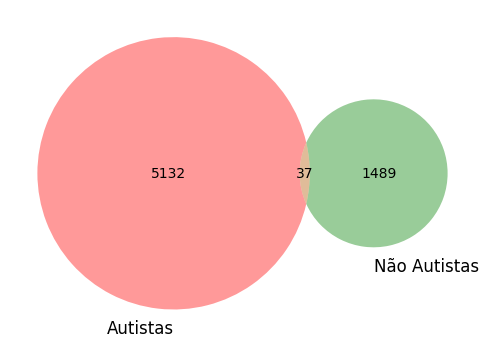

In [ ]:
#criando o diagrama de venn
plt.figure(figsize=(6,6))
set1 = set(df_TeaFreqPop['Variant'])
set2 = set(df_IrmaosFreqPop['Variant'])

venn2([set1, set2], ('Autistas', 'Não Autistas'))
plt.show()

# *3.9 - Estatística*

## **Análisando variantes de sítio de splicing**

In [ ]:
# contanto o numero de variantes do tipo splicing nos autistas
df_teaSplic = df_teaReset[df_teaReset['Func_refGene'] == 'splicing']
# removendo duplicações de child Id
df_teaSplic_noDup = df_teaSplic['Child_ID'].drop_duplicates()
df_teaSplic_noDup.count()

149

In [ ]:
# contanto o numero de variantes do tipo splicing nos irmãos
df_irmaosSplic = df_irmaosReset[df_irmaosReset['Func_refGene'] == 'splicing']
# removendo duplicações de child Id
df_irmaosSplic_noDup = df_irmaosSplic['Child_ID'].drop_duplicates()
df_irmaosSplic_noDup.count()

26

In [ ]:
# tabela de contigência para variantes de splicing em autistas e não autistas
df_splicingTable = pd.DataFrame([{'autistas': 0, 'nao_autistas': 0}], index =['variantes_presentes', 'variantes_ausentes'])
df_splicingTable['autistas'].variantes_presentes = df_teaSplic_noDup.count()
df_splicingTable['autistas'].variantes_ausentes = TOTAL_AUTISTAS - df_teaSplic_noDup.count()
df_splicingTable['nao_autistas'].variantes_presentes = df_irmaosSplic_noDup.count()
df_splicingTable['nao_autistas'].variantes_ausentes =  TOTAL_NAO_AUTISTAS - df_irmaosSplic_noDup.count()
df_splicingTable

,autistas,nao_autistas
variantes_presentes,149,26
variantes_ausentes,6281,2153


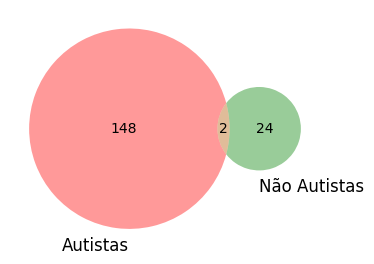

In [ ]:
# Diagrama de Venn - Variantes de Splicing
plt.figure(figsize=(4,4))
set1 = set(df_teaSplic['Variant'])
set2 = set(df_irmaosSplic['Variant'])

venn2([set1, set2], ('Autistas', 'Não Autistas'))
plt.show()

In [ ]:
oddsratio_variantes_splicing, pvalue_variantes_splicing = stats.fisher_exact(df_splicingTable)
print("odds-ratio: ", oddsratio_variantes_splicing, "p-value:", pvalue_variantes_splicing)

odds-ratio:  1.9643920002939268 p-value: 0.0010768825333604304


## **Análisando variantes de stop Códon**

In [ ]:
# contanto o numero de variantes do tipo stop códon nos autistas
df_teaStop = df_teaReset[df_teaReset['ExonicFunc_refGene'] == 'stopgain']
# removendo duplicações de child Id
df_teaStop_noDup = df_teaStop['Child_ID'].drop_duplicates()
df_teaStop_noDup.count()

397

In [ ]:
# contanto o numero de variantes do tipo stop códon nos irmãos
df_irmaosStop = df_irmaosReset[df_irmaosReset['ExonicFunc_refGene'] == 'stopgain']
# removendo duplicações de child Id
df_irmaosStop_noDup = df_irmaosStop['Child_ID'].drop_duplicates()
df_irmaosStop_noDup.count()

78

In [ ]:
# tabela de contigência para variantes de stop códon em autistas e não autistas
df_stopTable = pd.DataFrame([{'autistas': 0, 'nao_autistas': 0}], index =['variantes_presentes', 'variantes_ausentes'])
df_stopTable['autistas'].variantes_presentes = df_teaStop_noDup.count()
df_stopTable['autistas'].variantes_ausentes = TOTAL_AUTISTAS - df_teaStop_noDup.count()
df_stopTable['nao_autistas'].variantes_presentes = df_irmaosStop_noDup.count()
df_stopTable['nao_autistas'].variantes_ausentes =  TOTAL_NAO_AUTISTAS - df_irmaosStop_noDup.count()
df_stopTable

,autistas,nao_autistas
variantes_presentes,397,78
variantes_ausentes,6033,2101


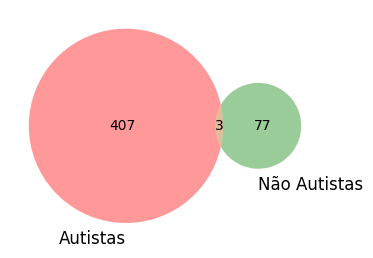

In [ ]:
# Diagrama de Venn - Variantes de Splicing
plt.figure(figsize=(4,4))
set1 = set(df_teaStop['Variant'])
set2 = set(df_irmaosStop['Variant'])

venn2([set1, set2], ('Autistas', 'Não Autistas'))
plt.show()

In [ ]:
oddsratio_variantes_stopcodon, pvalue_variantes_stopcodon = stats.fisher_exact(df_stopTable)
print("odds-ratio: ", oddsratio_variantes_stopcodon, "p-value:", pvalue_variantes_stopcodon)

odds-ratio:  1.7725097434197385 p-value: 2.1246424849483172e-06


# **CONCLUSÃO:**
Os resultados dos testes estatísticos para variantes em sítios de splicing expressam um valor de Odds Ratio (OR) de **1,96** e um **p-value de 0,001**, obtido por meio do teste de Fisher, sugerindo uma associação significativa dessas variantes com a condição do autismo, uma vez que a significância determinada foi de 0,5. Outros resultados relevantes foram encontrados nas variantes do tipo stop gain em pacientes com TEA com um odds-ratio de 1,77 e um p-value dentro do valor de confiança estabelecido.

Os achados deste trabalho estão alinhados com pesquisas anteriores (Iossifov et al., 2012; Sanders et al., 2012; Takata et al., 2018), que destacaram as variantes do tipo stop códon, frameshift e **mutações em sítios de splicing** como as mais associadas ao autismo, inclusive quando ligadas à proteína FMRP (fragile mental retardation protein).

A decisão de realizar apenas dois testes estatísticos nesta análise foi fundamentada na necessidade de reduzir o erro do tipo I e manter a integridade dos resultados, pois a realização de multíplos testes poderia elevar a probabilidade de falsos positivos. Assim, foi possível focar nos alvos relatados nos artigos e simplificar a interpretação dos resultados garantindo a confiabilidade e relevância das conclusões desta análise.

Portanto, os resultados deste trabalho fortalecem a hipótese de que as variantes nos sítios de splicing desempenham um papel relevante na etiologia do autismo.

# **ASPIRACIONAL🌟**

**Decidimos seguir com diferentes filtragem afim de realizar a Priorização de Variantes para finalidade de treinamento**

Filtragem de frequencia alélica menor que 0,1%

In [ ]:
df_nan = df_merged.replace(r".", np.nan)

In [ ]:
df_freq = df_nan[df_nan["AF"].notna()]

In [ ]:
df_freq['AF_numerico'] = pd.to_numeric(df_freq['AF'], errors='coerce')

<ipython-input-89-94fc9e4f6b9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_freq['AF_numerico'] = pd.to_numeric(df_freq['AF'], errors='coerce')


In [ ]:
df_freqPopulacional = df_freq[df_freq['AF_numerico'] <= 0.001]

In [ ]:
df_freqPopulacional

,DataSet,Child_ID,Phenotype_ID,Dad_ID,Mom_ID,Child_Sex,Affected_Status,Sex,IQ,age_of_walking,...,BS4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,REVEL,AF_numerico
Variant,,,,,,,,,,,,,,,,,,,,,
10:100242389:G:A,ASC_v15_VCF,10C107587,10C107587,10C107586,10C107585,Male,2,Male,99,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000084
10:101295137:G:A,ASC_v15_VCF,NP152,NP152,NF237,NF238,Male,2,Male,0,0,...,0,0,0,0,0,0,0,0,0.103,0.000000
10:101371064:G:A,ASC_v15_VCF,08C73959,08C73959,08C73957,08C73956,Female,1,Female,0,0,...,0,0,0,0,0,0,0,0,0.661,0.000008
10:101716819:C:T,ASC_v15_VCF,12060.s1,12060.s1,12060.fa,12060.mo,Female,1,Female,0,0,...,0,0,0,0,1,0,0,0,0.029,0.000008
10:101911819:G:A,ASC_v15_VCF,497-05-104034,497-05-104034,360-05-104041,359-05-104038,Male,2,Male,60,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X:79279657:G:A,SSC_Iossifov_2014,36066,14261.p1,14261.fa,14261.mo,Male,2,Male,101,13,...,0,0,0,0,0,0,0,0,0.859,0.000005
X:8434166:G:A,ASC_v15_VCF,TAS_F0144Y,TAS_F0144Y,TAS_F0144YA,TAS_F0144YB,Male,2,Male,82,0,...,0,0,0,0,1,0,0,1,NaN,0.000700
X:9677661:T:G,ASC_v15_VCF,6239,13890.p1,6762,6207,Female,2,Female,37,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000039


Extração de variantes exônicas e de splicing

In [ ]:
df_filtro2 = df_freqPopulacional[df_freqPopulacional["Func_refGene"].notna()]

In [ ]:
df_filtroFunc = df_filtro2[df_filtro2['Func_refGene'].str.contains('exonic|exonic;splicing|ncRNA_splicing|splicing|ncRNA_exonic;splicing')]

In [ ]:
df_filtroFunc

,DataSet,Child_ID,Phenotype_ID,Dad_ID,Mom_ID,Child_Sex,Affected_Status,Sex,IQ,age_of_walking,...,BS4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,REVEL,AF_numerico
Variant,,,,,,,,,,,,,,,,,,,,,
10:101295137:G:A,ASC_v15_VCF,NP152,NP152,NF237,NF238,Male,2,Male,0,0,...,0,0,0,0,0,0,0,0,0.103,0.000000
10:101371064:G:A,ASC_v15_VCF,08C73959,08C73959,08C73957,08C73956,Female,1,Female,0,0,...,0,0,0,0,0,0,0,0,0.661,0.000008
10:101716819:C:T,ASC_v15_VCF,12060.s1,12060.s1,12060.fa,12060.mo,Female,1,Female,0,0,...,0,0,0,0,1,0,0,0,0.029,0.000008
10:102054305:A:G,ASC_v15_VCF,08C75780,08C75780,08C75778,08C75779,Male,2,Male,95,15,...,0,0,0,0,0,0,0,0,0.905,0.000004
10:102054351:G:A,ASC_v15_VCF,AU163A,AU163A,AU163B,AU163C,Male,2,Male,66,0,...,0,0,0,0,0,0,0,0,0.684,0.000028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X:75649783:C:T,SSC_Iossifov_2014,12958.p1,12958.p1,12958.fa,12958.mo,Male,2,Male,88,11,...,0,0,0,0,0,0,0,0,0.110,0.000400
X:79279657:G:A,SSC_Iossifov_2014,36066,14261.p1,14261.fa,14261.mo,Male,2,Male,101,13,...,0,0,0,0,0,0,0,0,0.859,0.000005
X:8434166:G:A,ASC_v15_VCF,TAS_F0144Y,TAS_F0144Y,TAS_F0144YA,TAS_F0144YB,Male,2,Male,82,0,...,0,0,0,0,1,0,0,1,NaN,0.000700


Extração de variantes frameshift e stopgain

In [ ]:
df_filtro3 = df_filtroFunc[df_filtroFunc["ExonicFunc_refGene"].notna()]

In [ ]:
df_ExonFunc = df_filtro3[df_filtro3['ExonicFunc_refGene'].str.contains('frameshift substitution|nonsynonymous SNV|stopgain|unknown')]

In [ ]:
df_ExonFunc

,DataSet,Child_ID,Phenotype_ID,Dad_ID,Mom_ID,Child_Sex,Affected_Status,Sex,IQ,age_of_walking,...,BS4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,REVEL,AF_numerico
Variant,,,,,,,,,,,,,,,,,,,,,
10:101295137:G:A,ASC_v15_VCF,NP152,NP152,NF237,NF238,Male,2,Male,0,0,...,0,0,0,0,0,0,0,0,0.103,0.000000
10:101371064:G:A,ASC_v15_VCF,08C73959,08C73959,08C73957,08C73956,Female,1,Female,0,0,...,0,0,0,0,0,0,0,0,0.661,0.000008
10:101716819:C:T,ASC_v15_VCF,12060.s1,12060.s1,12060.fa,12060.mo,Female,1,Female,0,0,...,0,0,0,0,1,0,0,0,0.029,0.000008
10:102054305:A:G,ASC_v15_VCF,08C75780,08C75780,08C75778,08C75779,Male,2,Male,95,15,...,0,0,0,0,0,0,0,0,0.905,0.000004
10:102054351:G:A,ASC_v15_VCF,AU163A,AU163A,AU163B,AU163C,Male,2,Male,66,0,...,0,0,0,0,0,0,0,0,0.684,0.000028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X:73960990:G:T,SSC_Iossifov_2014,SSC02825,11290.p1,11290.fa,11290.mo,Male,2,Male,119,12,...,0,1,0,0,0,0,0,0,0.282,0.000100
X:75649014:G:A,ASC_v15_VCF,DEASD_0226_001,DEASD_0226_001,DEASD_0226_500,DEASD_0226_600,Female,2,Female,0,14,...,0,0,0,0,1,0,0,0,0.029,0.000006
X:75649783:C:T,SSC_Iossifov_2014,12958.p1,12958.p1,12958.fa,12958.mo,Male,2,Male,88,11,...,0,0,0,0,0,0,0,0,0.110,0.000400


*Filtro* revel

In [ ]:
df_filtro4 = df_ExonFunc[df_ExonFunc["REVEL"].notna()]

In [ ]:
df_filtro4['REVEL_numerico'] = pd.to_numeric(df_filtro4['REVEL'], errors='coerce')

<ipython-input-53-4ad6810f0f7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro4['REVEL_numerico'] = pd.to_numeric(df_filtro4['REVEL'], errors='coerce')


In [ ]:
df_filtro4

,DataSet,Child_ID,Phenotype_ID,Dad_ID,Mom_ID,Child_Sex,Affected_Status,Sex,IQ,age_of_walking,...,BP1,BP2,BP3,BP4,BP5,BP6,BP7,REVEL,AF_numerico,REVEL_numerico
Variant,,,,,,,,,,,,,,,,,,,,,
10:101295137:G:A,ASC_v15_VCF,NP152,NP152,NF237,NF238,Male,2,Male,0,0,...,0,0,0,0,0,0,0,0.103,0.000000,0.103
10:101371064:G:A,ASC_v15_VCF,08C73959,08C73959,08C73957,08C73956,Female,1,Female,0,0,...,0,0,0,0,0,0,0,0.661,0.000008,0.661
10:101716819:C:T,ASC_v15_VCF,12060.s1,12060.s1,12060.fa,12060.mo,Female,1,Female,0,0,...,0,0,0,1,0,0,0,0.029,0.000008,0.029
10:102054305:A:G,ASC_v15_VCF,08C75780,08C75780,08C75778,08C75779,Male,2,Male,95,15,...,0,0,0,0,0,0,0,0.905,0.000004,0.905
10:102054351:G:A,ASC_v15_VCF,AU163A,AU163A,AU163B,AU163C,Male,2,Male,66,0,...,0,0,0,0,0,0,0,0.684,0.000028,0.684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X:71425821:T:G,SSC_Iossifov_2014,12958.p1,12958.p1,12958.fa,12958.mo,Male,2,Male,88,11,...,0,0,0,0,0,0,0,0.300,0.000011,0.300
X:73960990:G:T,SSC_Iossifov_2014,SSC02825,11290.p1,11290.fa,11290.mo,Male,2,Male,119,12,...,1,0,0,0,0,0,0,0.282,0.000100,0.282
X:75649014:G:A,ASC_v15_VCF,DEASD_0226_001,DEASD_0226_001,DEASD_0226_500,DEASD_0226_600,Female,2,Female,0,14,...,0,0,0,1,0,0,0,0.029,0.000006,0.029


In [ ]:
df_revel = df_filtro4[df_filtro4['REVEL_numerico'] >= 0.7]

In [ ]:
df_revel

,DataSet,Child_ID,Phenotype_ID,Dad_ID,Mom_ID,Child_Sex,Affected_Status,Sex,IQ,age_of_walking,...,BP1,BP2,BP3,BP4,BP5,BP6,BP7,REVEL,AF_numerico,REVEL_numerico
Variant,,,,,,,,,,,,,,,,,,,,,
10:102054305:A:G,ASC_v15_VCF,08C75780,08C75780,08C75778,08C75779,Male,2,Male,95,15,...,0,0,0,0,0,0,0,0.905,0.000004,0.905
10:102056960:A:C,ASC_v15_VCF,5024,13102.p1,4960,4992,Female,2,Female,93,14,...,0,0,0,0,0,0,0,0.815,0.000052,0.815
10:12257793:G:A,ASC_v15_VCF,SSC07834,13396.s1,SSC07833,SSC07828,Female,1,Female,0,0,...,0,0,0,0,0,0,0,0.794,0.000028,0.794
10:123600736:A:G,ASC_v15_VCF,8264,11959.s1,5837,5869,Female,1,Female,0,0,...,0,0,0,0,0,0,0,0.745,0.000004,0.745
10:32106768:T:C,SSC_Iossifov_2014,12673.s1,12673.s1,12673.fa,12673.mo,Male,1,Male,0,0,...,0,0,0,0,0,0,0,0.879,0.000004,0.879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9:36246115:G:A,ASC_v15_VCF,200675689@1082034232,200675689@1082034232,200675687@1082034716,200675688@1082035021,Male,2,Male,106,12,...,0,0,0,0,0,0,0,0.840,0.000012,0.840
9:80039082:G:A,SSC_Iossifov_2014,12297.s1,12297.s1,12297.fa,12297.mo,Male,1,Male,0,0,...,0,0,0,0,0,0,0,0.710,0.000062,0.710
X:153051410:C:T,ASC_v15_VCF,3B334,3B334,4D933,4D934,Female,2,Female,0,0,...,0,0,0,0,0,0,0,0.737,0.000011,0.737


**Análisando as variantes filtradas**

In [ ]:
df_revel["ExonicFunc_refGene"].value_counts()

nonsynonymous SNV    271
stopgain               1
Name: ExonicFunc_refGene, dtype: int64

In [ ]:
df_revel["Func_refGene"].value_counts()

exonic    272
Name: Func_refGene, dtype: int64

In [ ]:
#predição de impacto
df_revel["InterVar_automated"].value_counts()

Uncertain significance    254
Likely pathogenic          16
Likely benign               2
Name: InterVar_automated, dtype: int64

In [ ]:
#total de variantes autistas x irmãos
df_revel["Affected_Status"].value_counts()
# 2 = indivíduos autistas
# 1 = irmãos dos indivíduos autistas

2    220
1     52
Name: Affected_Status, dtype: int64

In [ ]:
df_revel.groupby("Affected_Status")["ExonicFunc_refGene"].value_counts(normalize = True)

Affected_Status  ExonicFunc_refGene
1                nonsynonymous SNV     0.980769
                 stopgain              0.019231
2                nonsynonymous SNV     1.000000
Name: ExonicFunc_refGene, dtype: float64